In [17]:
import numpy as np
# import cupy as np

In [18]:
# 加载数据集
mnist=np.load('mnist/mnist.npz')
train_images, train_labels = mnist['x_train'], mnist['y_train']
test_images, test_labels = mnist['x_test'], mnist['y_test']


In [19]:
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]
print(train_images.shape, train_labels.shape)
# 将图像数据转换为浮点数，并归一化到0-1之间
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

(60000, 28, 28) (60000, 10)


In [20]:
# 将图像数据展平为一维数组
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

In [21]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size,learning_rate = 0.01,tol=1e-4):
        self.weights1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        self.weights2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))
        self.learning_rate=learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.output1 = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.output2 = self.sigmoid(np.dot(self.output1, self.weights2) + self.bias2)
        return self.output2
    
    def backward(self, x, true, output):
        error = output-true
        output2_derivative = error * self.sigmoid_derivative(output)
        error1 = output2_derivative.dot(self.weights2.T)
        output1_derivative = error1 * self.sigmoid_derivative(self.output1)    
        self.weights2 -= self.learning_rate*self.output1.T.dot(output2_derivative)
        self.weights1 -= self.learning_rate*x.reshape(784, 1).dot(output1_derivative)
        self.bias2 -=self.learning_rate* np.sum(output2_derivative, axis=0, keepdims=True)
        self.bias1 -=self.learning_rate* np.sum(output1_derivative, axis=0, keepdims=True)
    
    def cross_entropy_loss(self,output, true):
        delta = 1e-7
        output = np.clip(output, delta, 1 - delta)
        return -np.sum(true * np.log(output), axis=1)

In [22]:
def evaluate_nn(nn, test_images, test_labels):
    correct = 0
    for image, label in zip(test_images, test_labels):
        output = nn.forward(image)
        predicted = np.argmax(output)
        actual = np.argmax(label)
        if predicted == actual:
            correct += 1
    accuracy = correct / len(test_labels)
    print(f"Accuracy: {accuracy * 100}%")

In [23]:
def train_nn(nn, train_images, train_labels, epochs, tol=1e-4):
    for epoch in range(epochs):
        loss=0
        for image, label in zip(train_images, train_labels):
            output = nn.forward(image)
            nn.backward(image, label, output)
            loss+=nn.cross_entropy_loss(output, label)
        print("loss:",loss/len(train_images))
        if loss<tol:
            break
        print(f"Epoch {epoch} complete")

Epoch 0 complete, loss: [0.46272868]
Epoch 1 complete, loss: [0.2519031]
Epoch 2 complete, loss: [0.18439669]
Epoch 3 complete, loss: [0.14880977]
Epoch 4 complete, loss: [0.12644574]
Epoch 5 complete, loss: [0.11057056]
Epoch 6 complete, loss: [0.09829798]
Epoch 7 complete, loss: [0.0886687]
Epoch 8 complete, loss: [0.08072197]
Epoch 9 complete, loss: [0.074108]
Epoch 10 complete, loss: [0.06855509]
Epoch 11 complete, loss: [0.06378623]
Epoch 12 complete, loss: [0.05956849]
Epoch 13 complete, loss: [0.05585464]
Epoch 14 complete, loss: [0.05261969]
Epoch 15 complete, loss: [0.04982324]
Epoch 16 complete, loss: [0.04739015]
Epoch 17 complete, loss: [0.04529279]
Epoch 18 complete, loss: [0.04346508]
Epoch 19 complete, loss: [0.04183434]
Epoch 20 complete, loss: [0.04033542]
Epoch 21 complete, loss: [0.03900523]
Epoch 22 complete, loss: [0.03784293]
Epoch 23 complete, loss: [0.0366972]
Epoch 24 complete, loss: [0.03559211]
Epoch 25 complete, loss: [0.03455396]
Epoch 26 complete, loss: [0

C:\Users\Administrator\PycharmProjects\MNIST\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\PycharmProjects\MNIST\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\PycharmProjects\MNIST\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\PycharmProjects\MNIST\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


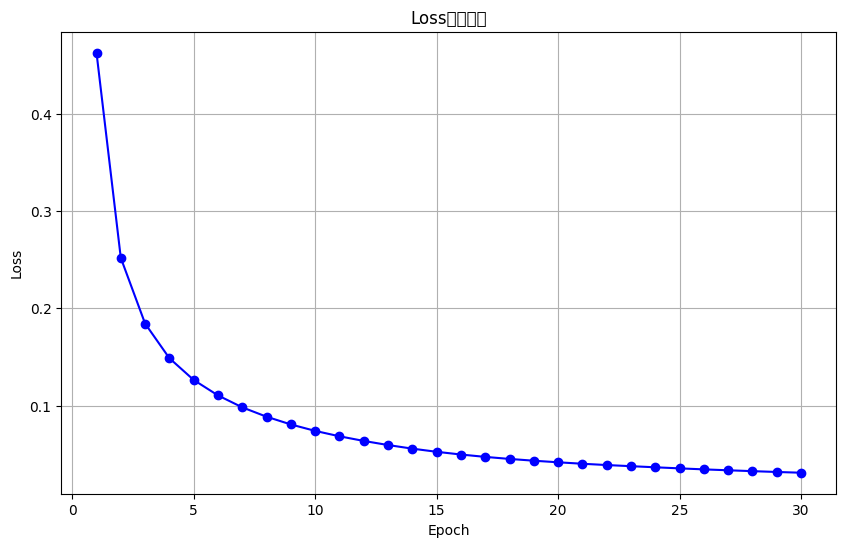

In [24]:
def plot_loss(loss_history):
    """
    绘制损失下降图像的函数。
    
    参数:
    loss_history (list): 每个epoch的损失值列表。
    """
    epochs = range(1, len(loss_history) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, marker='o', linestyle='-', color='b')
    plt.title('Loss下降图像')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# 将训练过程中的损失值存储在一个列表中
loss_history = []

def train_nn_with_loss_tracking(nn, train_images, train_labels, epochs, tol=1e-4):
    for epoch in range(epochs):
        loss = 0
        for image, label in zip(train_images, train_labels):
            output = nn.forward(image)
            nn.backward(image, label, output)
            loss += nn.cross_entropy_loss(output, label)
        average_loss = loss / len(train_images)
        loss_history.append(average_loss)
        print(f"Epoch {epoch} complete, loss: {average_loss}")
        if average_loss < tol:
            break

# 使用新的训练函数来训练神经网络并记录损失值
input_size = 28 * 28
hidden_size = 256
output_size = 10
learning_rate = 0.1
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

train_nn_with_loss_tracking(nn, train_images, train_labels, epochs=30, tol=1e-2)

# 绘制损失下降图像
plot_loss(loss_history)


In [25]:
# 评估神经网络
print(test_images.shape)
evaluate_nn(nn, test_images, test_labels)



(10000, 784)
Accuracy: 98.24000000000001%
